# DA Final project: Sleep Efficiency

# Group 

# Going Of The Rails

###  Name of students:
Roy Ashkenazi<br>
Zohar Kulp<br>
Oz Kenner<br>



<a id='top'></a>

<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/sleep-share-card.jpeg?raw=true" width="800"/>
</div>


In [573]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
from datetime import date
import matplotlib.patches as mpatches

In [574]:
url = 'https://raw.githubusercontent.com/RoidoAsh/project1/main/Sleep_Efficiency.csv'
Sleep_Efficiency = pd.read_csv(url)
Sleep_Efficiency['Smoking status'] = Sleep_Efficiency['Smoking status'].map({'Yes': 1, 'No': 0})
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


In [575]:
Sleep_Efficiency.shape

(452, 15)

In [576]:
Sleep_Efficiency.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [577]:
Sleep_Efficiency.dtypes

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status              int64
Exercise frequency        float64
dtype: object

In [578]:
Sleep_Efficiency.isnull().sum().sort_values()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Smoking status             0
Exercise frequency         6
Alcohol consumption       14
Awakenings                20
Caffeine consumption      25
dtype: int64

##ראינו כי אין משעמות גדולה לערכים החסרים ולכן לא נבצע שינוים בדאטה

In [579]:
average_sleep_duration = Sleep_Efficiency.groupby('Gender')['Sleep duration'].mean().reset_index()
average_sleep_duration

,Gender,Sleep duration
0,Female,7.504464
1,Male,7.427632


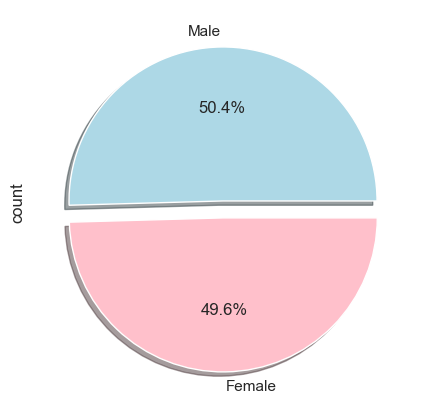

In [580]:
Sleep_Efficiency['Gender'].replace([0, 1],['Female', 'Male'], inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=55)
gender_counts = Sleep_Efficiency['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['lightblue', 'pink'])


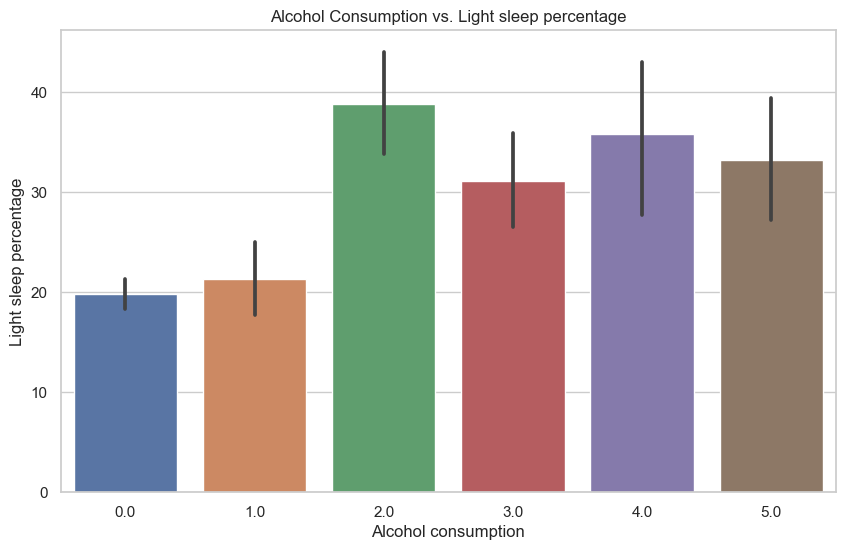

In [581]:
Sleep_Efficiency['Alcohol consumption'] = pd.to_numeric(Sleep_Efficiency['Alcohol consumption'], errors='coerce')
Sleep_Efficiency['Alcohol Category'] = Sleep_Efficiency['Alcohol consumption'].apply(lambda x: 'Consumers' if x > 0 else 'Non-Consumers')
plt.figure(figsize=(10, 6))
sns.barplot(data=Sleep_Efficiency, x='Alcohol consumption', y='Light sleep percentage')
plt.title('Alcohol Consumption vs. Light sleep percentage')
plt.show()

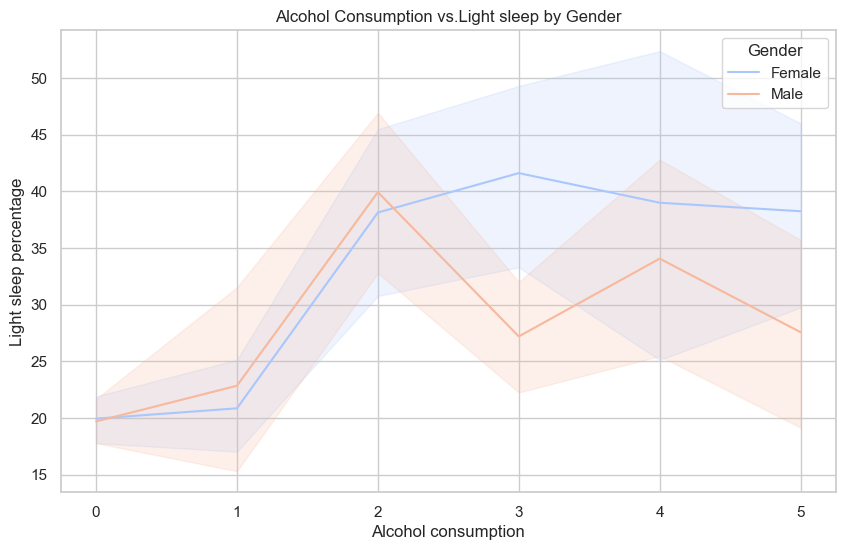

In [582]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Sleep_Efficiency, x='Alcohol consumption', y='Light sleep percentage', hue='Gender', palette='coolwarm')
plt.title('Alcohol Consumption vs.Light sleep by Gender')
plt.show()

> # Conclusion 2:

מללללללל

In [583]:
Sleep_Efficiency['Sleep efficiency'] = Sleep_Efficiency['Sleep efficiency'].apply(lambda x: 1 if x > 0.85 else 0)

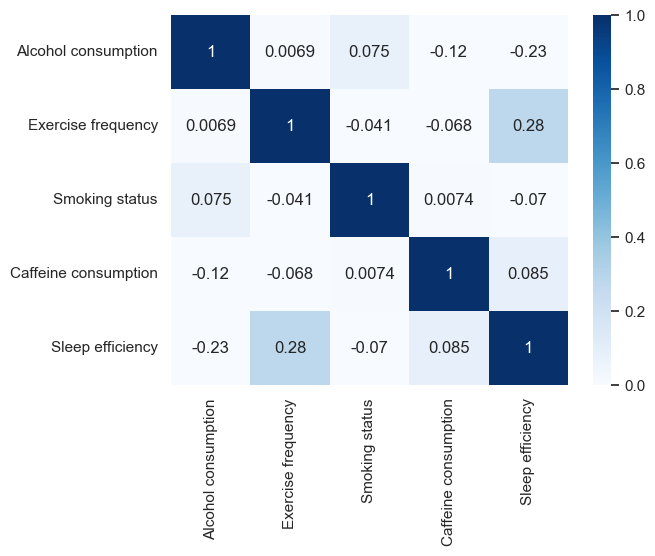

In [584]:
features1 = ['Alcohol consumption','Exercise frequency','Smoking status','Caffeine consumption','Sleep efficiency']
correlation_matrix = Sleep_Efficiency[features1].corr()
sns.heatmap(correlation_matrix, vmin=0.0 , vmax = 1,cmap='Blues' , annot=True);

למרות הציפייה להתאמה גבוהה בין הנושאים שנבחרו, ראינו כי אין התאמה 

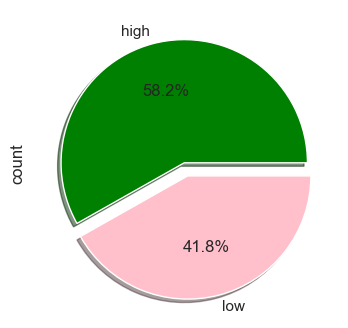

In [585]:
Sleep_Efficiency['Sleep efficiency'].replace([0, 1],["high", "low"], inplace=True)
plt.figure(figsize=(10,4))
plt.xticks(rotation=50)
sex_percent = Sleep_Efficiency['Sleep efficiency'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['green', 'pink'])

In [586]:
Sleep_Efficiency['Sleep efficiency'].replace(["high", "low"],[0, 1], inplace=True)

In [591]:
up_85 = Sleep_Efficiency.loc[(Sleep_Efficiency['Sleep efficiency'] == 1)].reset_index(drop=True)


In [588]:
Sleep_Efficiency.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Alcohol Category'],
      dtype='object')

נרצה לנתח נתונים חדשים על מנת למצוא את הגורמים לאיכות שינה לא טובה

C:\Users\roido\AppData\Local\Temp\ipykernel_22240\2391969538.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=up_85,stat='percent', x="Gender", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,0], color = ("orange"))
C:\Users\roido\AppData\Local\Temp\ipykernel_22240\2391969538.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=up_85 ,stat='percent', x="Age", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,1], color = ("orange"))
C:\Users\roido\AppData\Local\Temp\ipykernel_22240\2391969538.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=up_85,stat='percent', x="Sleep duration", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,2], color = ("orange"))
C:\Users\roido\AppData\Local\Temp\ipykernel_22240\2391969538.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplo

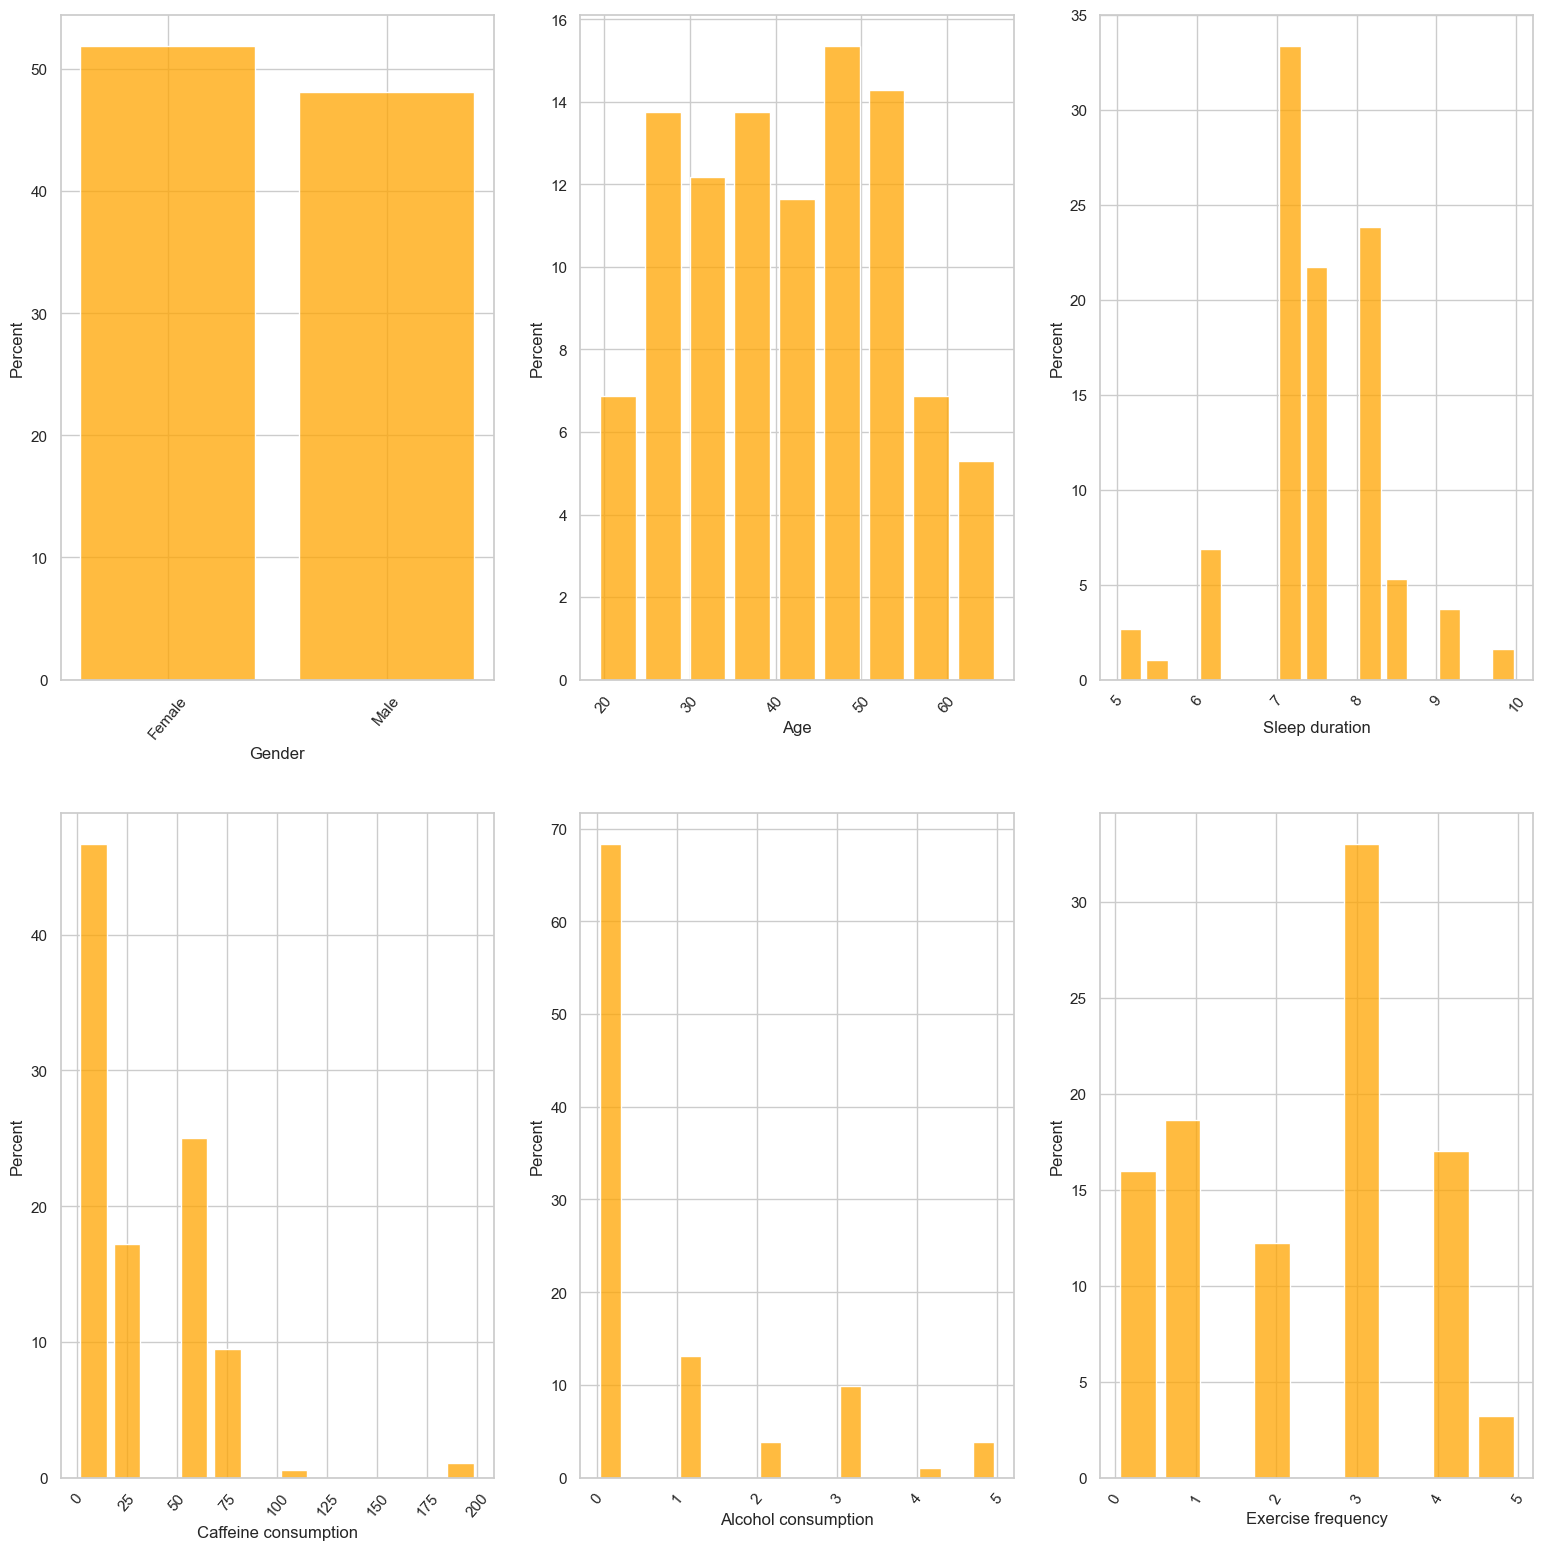

In [592]:
fig, axes= plt.subplots(2,3,figsize=(19,19))
axes[0,0].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_85,stat='percent', x="Gender", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,0], color = ("orange"))
axes[0,1].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_85 ,stat='percent', x="Age", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,1], color = ("orange"))
axes[0,2].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_85,stat='percent', x="Sleep duration", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,2], color = ("orange"))
axes[1,0].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_85 ,stat='percent', x="Caffeine consumption", multiple="dodge", shrink=.8 , palette="bright",ax=axes[1,0], color = ("orange"))
axes[1,1].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_85,stat='percent', x="Alcohol consumption", multiple="dodge", shrink=.8 , palette="bright" ,ax=axes[1,1], color = ("orange"))
axes[1,2].tick_params(axis='x', labelrotation=60)
sns.histplot(data=up_85 ,stat='percent', x="Exercise frequency", multiple="dodge", shrink=.8 , palette="bright",ax=axes[1,2], color = ("orange"));
#axes[2,0].tick_params(axis='x', labelrotation=60)
#sns.histplot(data=up_85 ,stat='percent', x="Exercise frequency", multiple="dodge", shrink=.8 , palette="bright",ax=axes[2,0], color = ("orange") );

In [602]:
#Sleep_Efficiency['Smoking status'] = Sleep_Efficiency['Smoking status'].replace({'No': 0, 'Yes': 1})
# features = ['Alcohol consumption', 'Exercise frequency', 'Smoking status', 'Caffeine consumption', 'Sleep efficiency']
# correlation_matrix = Sleep_Efficiency[features].corr()
# plt.figure(figsize=(6, 4))
# sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, cmap='Blues', annot=True)
# plt.title('Correlation Matrix')
# plt.show()

In [601]:
# Sleep_Efficiency['Sleep Quality'] = Sleep_Efficiency['Sleep efficiency'].apply(lambda x: 1 if x > 0.85 else 0)
# Sleep_Efficiency


In [600]:
# Update the 'Sleep efficiency' column
# Sleep_Efficiency['Sleep efficiency'] = Sleep_Efficiency['Sleep efficiency'].apply(lambda x: 1 if x > 0.85 else 0)

# Display the first few rows of the updated dataset
#Sleep_Efficiency.head()


In [459]:
Sleep_Efficiency.shape

(452, 16)

In [599]:
# plt.figure(figsize=(10, 6))
# plt.hist(Sleep_Efficiency['Alcohol consumption'], bins=20, color='skyblue', edgecolor='black')
# plt.title('Density plot of Alcohol')
# plt.xlabel('Alcohol')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [598]:
# plt.figure(figsize=(6, 4))
# plt.hist(Sleep_Efficiency['Caffeine consumption'], bins=20, color='skyblue', edgecolor='black')
# plt.title('Density plot of Caffeine')
# plt.xlabel('Caffeine')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

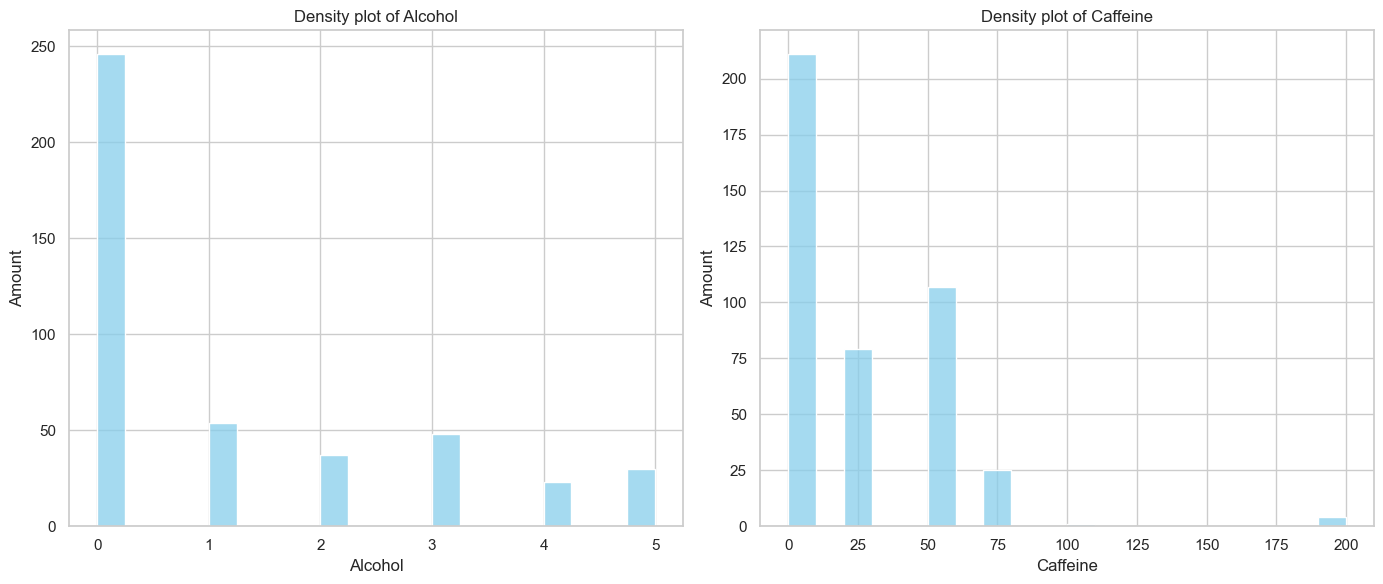

In [597]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(Sleep_Efficiency['Alcohol consumption'], bins=20, kde=False, color='skyblue', ax=axs[0])
axs[0].set_title('Density plot of Alcohol')
axs[0].set_xlabel('Alcohol')
axs[0].set_ylabel('Amount')

sns.histplot(Sleep_Efficiency['Caffeine consumption'], bins=20, kde=False, color='skyblue', ax=axs[1])
axs[1].set_title('Density plot of Caffeine')
axs[1].set_xlabel('Caffeine')
axs[1].set_ylabel('Amount')

plt.tight_layout()
plt.show()


אנחנו יכולים לראות שכמעט מחצית האנשים צורכים אלכוהול וקפאין והחצי השני לא צורך,
נרצה לבדוק את ההבדלים בין שתי הקבוצות הללו לפי קטגוריות גיל שונות 

In [606]:

age_bins = [0, 24, 44, 64, 100]
age_labels = ['0-24', '25-44', '45-64', '65+']

Sleep_Efficiency['Age Category'] = pd.cut(Sleep_Efficiency['Age'], bins=age_bins, labels=age_labels, right=False)

alcohol_consumption = Sleep_Efficiency.groupby(['Age Category', Sleep_Efficiency['Alcohol consumption'] > 0]).size().unstack(fill_value=0)
alcohol_consumption.columns = ['Does not consume alcohol', 'Consumes alcohol']

caffeine_consumption = Sleep_Efficiency.groupby(['Age Category', Sleep_Efficiency['Caffeine consumption'] > 0]).size().unstack(fill_value=0)
caffeine_consumption.columns = ['Does not consume caffeine', 'Consumes caffeine']

In [607]:
alcohol_consumption


,Does not consume alcohol,Consumes alcohol
Age Category,,
0-24,29,12
25-44,120,98
45-64,102,74
65+,9,8


In [608]:
caffeine_consumption

,Does not consume caffeine,Consumes caffeine
Age Category,,
0-24,23,18
25-44,84,134
45-64,118,58
65+,11,6


C:\Users\roido\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


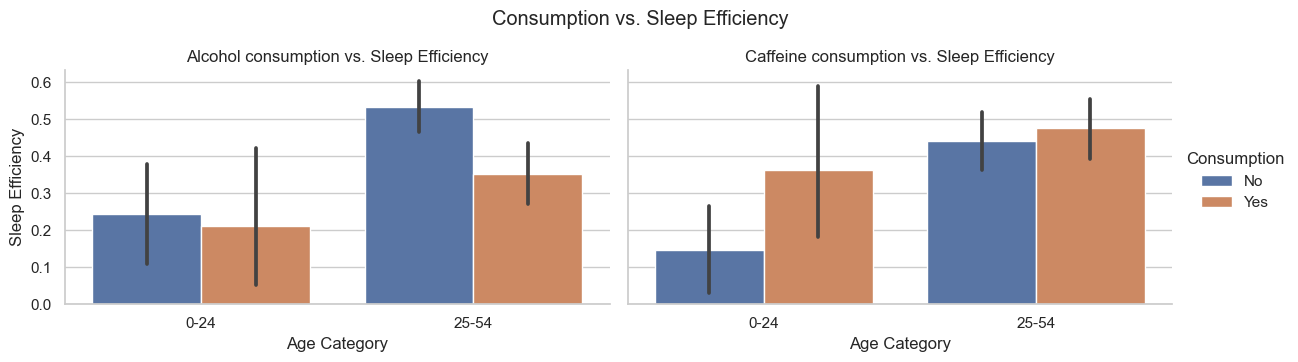

In [512]:

age_bins = [0, 24, 54]
age_labels = ['0-24', '25-54']
Sleep_Efficiency['Age Category'] = pd.cut(Sleep_Efficiency['Age'], bins=age_bins, labels=age_labels, right=True)

melted_data = pd.melt(Sleep_Efficiency, id_vars=['Age Category', 'Sleep efficiency'], 
                      value_vars=['Alcohol consumption', 'Caffeine consumption'],
                      var_name='Substance', value_name='Consumption')

melted_data['Consumption'] = melted_data['Consumption'] > 0
melted_data['Consumption'] = melted_data['Consumption'].map({True: 'Yes', False: 'No'})

sns.set(style="whitegrid")

g = sns.catplot(x='Age Category', y='Sleep efficiency', hue='Consumption', col='Substance', 
                data=melted_data, kind='bar', height=6, aspect=1)

g.set_axis_labels('Age Category', 'Sleep Efficiency')
g.set_titles("{col_name} vs. Sleep Efficiency")
g.fig.suptitle('Consumption vs. Sleep Efficiency', y=0.6)

g.fig.subplots_adjust(top=0.5)

# Show the plot
plt.show()


ניתן לראות שאנשים שצורכים קפאין לעומת אלו שלא צורכים קפאין בקטגוריית גיל 25-24 איכות השינה שלהם זהה כמעט לגמרי(כלומר אנו מסיקים במפתיע שצריכת קפאין אינה משפיעה על איכות השינה בקטגוריית גיל הזאת). 

ניתן לראות שאנשים שצורכים אלכוהול לעמות אלו שלא צורכים אלכוהול בקטגוריית גיל 0-24 איכות השינה שלהם זהה כמעט לגמרי (כלומר אנו מסיקים במפתיע שצריכת אלכוהול אינה משפיעה על איכות השינה בקטגוריית גל הזאת) 


In [458]:
consum = Sleep_Efficiency[Sleep_Efficiency['Caffeine consumption'] > 0]
consum1 = Sleep_Efficiency[Sleep_Efficiency['Caffeine consumption'] == 0]

<Figure size 1200x800 with 0 Axes>

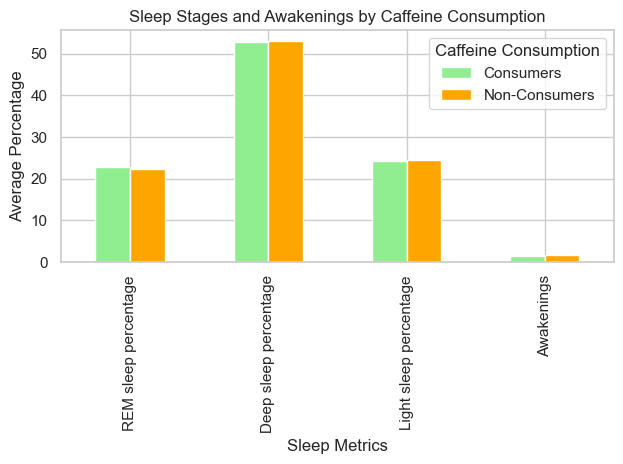

In [384]:
# Filter the data into two groups
caffeine_consumers = Sleep_Efficiency[Sleep_Efficiency['Caffeine consumption'] > 0]
caffeine_non_consumers = Sleep_Efficiency[Sleep_Efficiency['Caffeine consumption'] == 0]

# Calculate the means for each group
caffeine_groups = {'Consumers': caffeine_consumers[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings']].mean(),'Non-Consumers': caffeine_non_consumers[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings']].mean()}

# Create a DataFrame from the results 
caffeine_df = pd.DataFrame(caffeine_groups)

# Create the bar plot
plt.figure(figsize=(12, 8))
caffeine_df.plot(kind='bar', color=['lightgreen', 'orange'])

# Set plot titles and labels
plt.title('Sleep Stages and Awakenings by Caffeine Consumption')
plt.xlabel('Sleep Metrics')
plt.ylabel('Average Percentage')
plt.legend(title='Caffeine Consumption')

# Display the plot
plt.tight_layout()
plt.show()


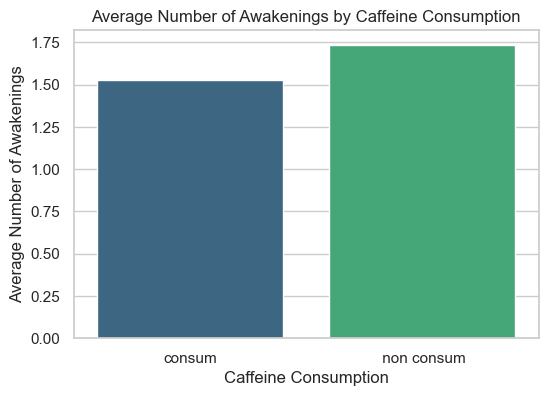

In [352]:
Sleep_Efficiency = pd.DataFrame({'Caffeine Consumption': ['consum', ' non consum'], 'Awakenings': [consum['Awakenings'].mean(), consum1['Awakenings'].mean()]})
                                 
# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Caffeine Consumption', y='Awakenings', data=Sleep_Efficiency, palette='viridis')
plt.title('Average Number of Awakenings by Caffeine Consumption')
plt.xlabel('Caffeine Consumption')
plt.ylabel('Average Number of Awakenings')
plt.show()



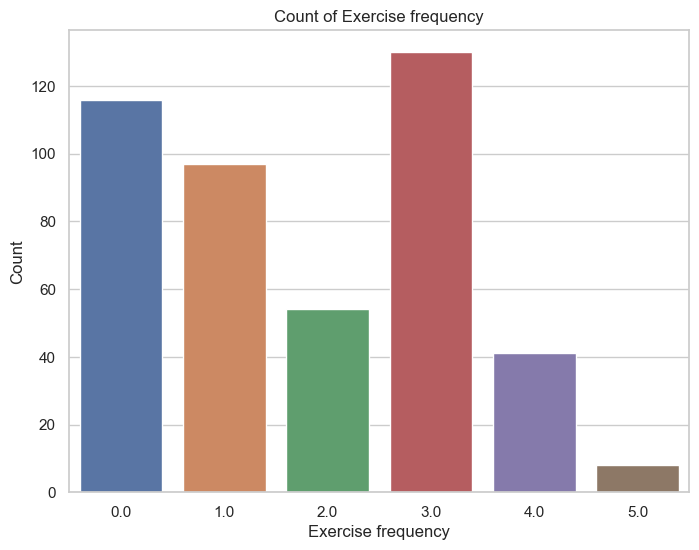

In [131]:
plt.figure(figsize=(8, 6))
sns.countplot(data=Sleep_Efficiency, x='Exercise frequency')
plt.title('Count of Exercise frequency')
plt.xlabel('Exercise frequency')
plt.ylabel('Count')
plt.show()

In [132]:
over_3_exercise = Sleep_Efficiency[Sleep_Efficiency['Exercise frequency'] >=3]
over_3_exercise

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
7,8,53,Male,2021-08-16 00:30:00,2021-08-16 10:30:00,10.0,0.90,28,52,20,0.0,50.0,0.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,55,Male,2021-04-14 01:30:00,2021-04-14 07:30:00,6.0,0.90,28,57,15,1.0,0.0,3.0,0,3.0
439,440,25,Male,2021-11-30 23:00:00,2021-11-30 06:30:00,7.5,0.50,20,35,45,4.0,0.0,3.0,1,3.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0


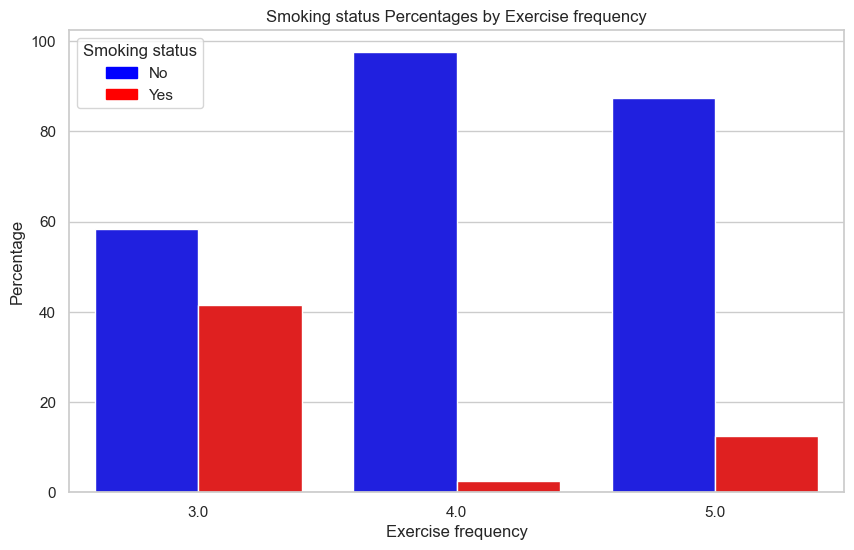

In [133]:
category_column = 'Exercise frequency'  # Replace with your actual column name for exercise frequency
target_column = 'Smoking status'  # Replace with your actual column name for smoking status
data = over_3_exercise.groupby(category_column)[target_column].value_counts(normalize=True).unstack() * 100
data = data.reset_index().melt(id_vars=category_column, var_name=target_column, value_name='Percentage')
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = ['blue', 'red']
sns.barplot(data=data, x=category_column, y='Percentage', hue=target_column, palette=palette)
plt.title(f'{target_column.replace("_", " ").capitalize()} Percentages by {category_column.replace("_", " ").capitalize()}')
plt.xlabel(category_column.replace("_", " ").capitalize())
plt.ylabel('Percentage')
blue_patch = mpatches.Patch(color='blue', label='No')
red_patch = mpatches.Patch(color='red', label='Yes')
plt.legend(title=target_column.replace("_", " ").capitalize(), handles=[blue_patch, red_patch])
plt.xticks(rotation=0)
plt.show()

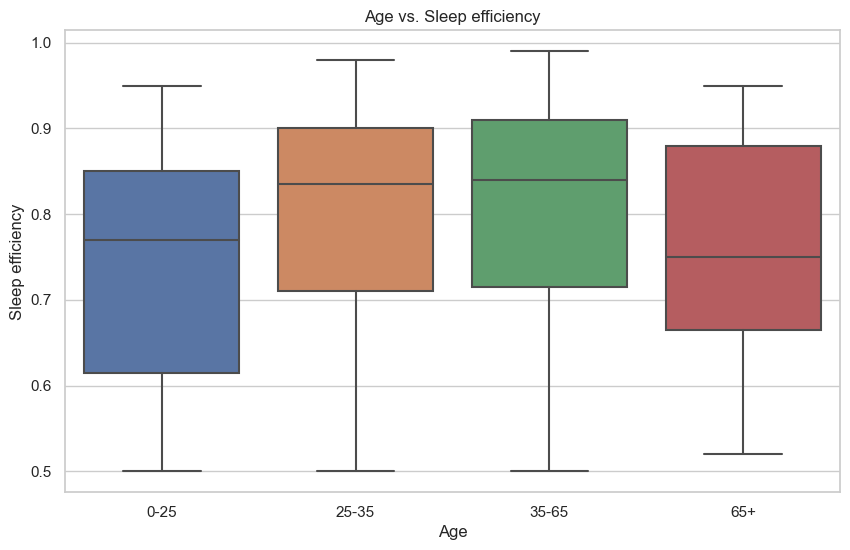

In [134]:
bins = [0, 25, 35, 65, float('inf')]
labels = ['0-25', '25-35', '35-65', '65+']
Sleep_Efficiency['Age'] = pd.cut(Sleep_Efficiency['Age'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.boxplot(data=Sleep_Efficiency, x='Age', y='Sleep efficiency')
plt.title('Age vs. Sleep efficiency')
plt.show()

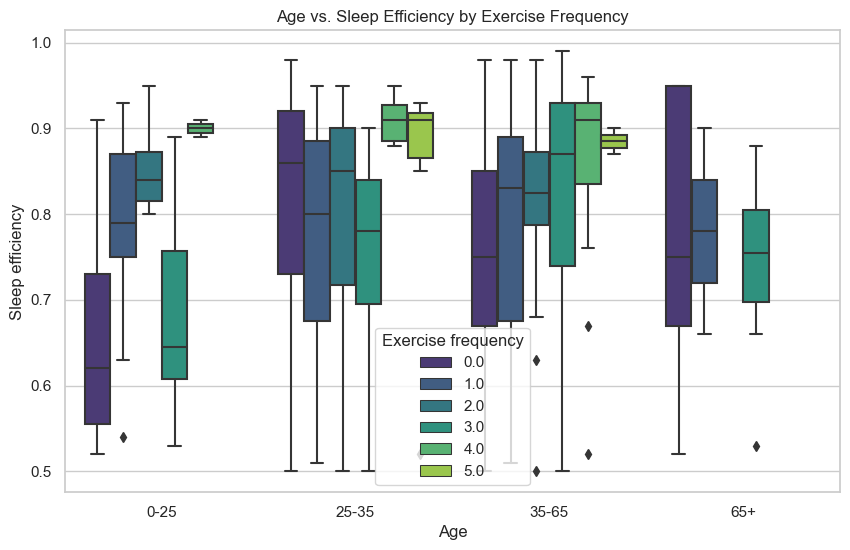

In [138]:
# Step 2: Plot Age Category vs. Sleep Efficiency by Exercise Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(data=Sleep_Efficiency, x='Age', y='Sleep efficiency', hue='Exercise frequency', palette='viridis')
plt.title('Age vs. Sleep Efficiency by Exercise Frequency')
plt.show()


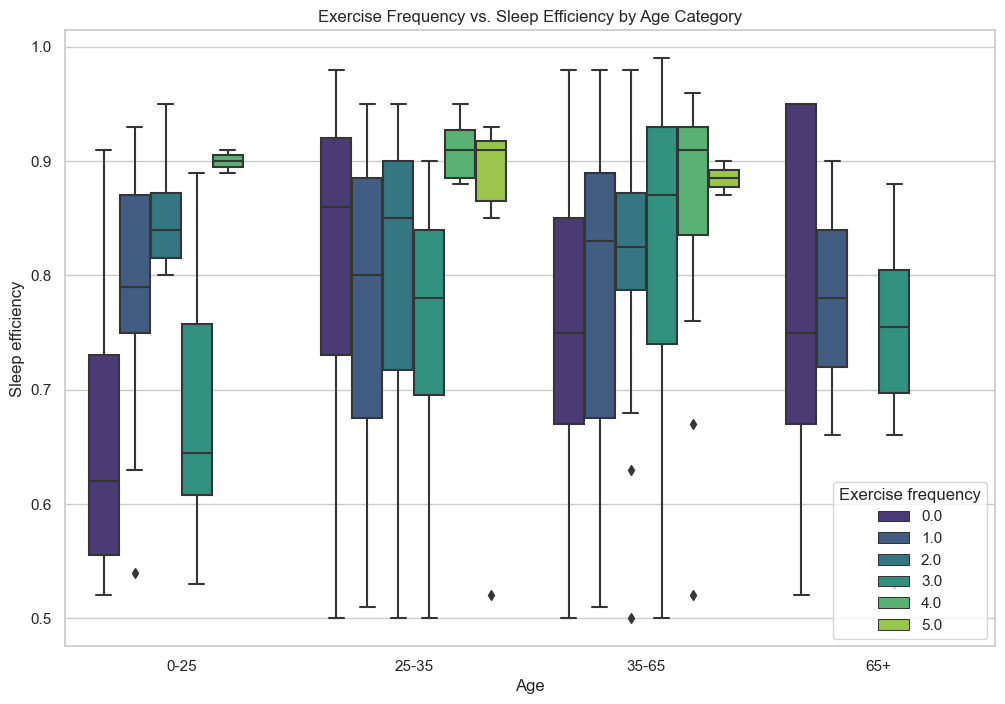

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Plot Exercise Frequency vs. Sleep Efficiency by Age Category
plt.figure(figsize=(12, 8))
sns.boxplot(data=Sleep_Efficiency, x='Age', y='Sleep efficiency', hue='Exercise frequency', palette='viridis')
plt.title('Exercise Frequency vs. Sleep Efficiency by Age Category')
plt.show()
